# setup

In [2]:
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


# ct4 ads1115

Design a 4 CT energy monitor for 4 circuits. On hand are a number of 15A/1v and 20A/1v current transformers. When the CT has that kind of designation, the burden resistor is already included. (If not calculate burden resistor below in `ref`)

## ref

* [CT Sensors - Interfacing with an Arduino -OpenEnergyMonitor](https://docs.openenergymonitor.org/electricity-monitoring/ct-sensors/interface-with-arduino.html)
* [Emon Lib - OpenEnergyMonitor](https://github.com/openenergymonitor/EmonLib)
* [KiCad templates for board manufacturers](https://github.com/sethhillbrand/kicad_templates)
* [Esp32-DevKit-V1-DOIT Kicad sym & pretty mod](https://github.com/syauqibilfaqih/ESP32-DevKit-V1-DOIT?tab=readme-ov-file)
* [How to use ADS1115 16 bit ADC module with ESP32](https://www.perceptive-ic.com/news-detailed/How-to-use-ADS1115-16-bit-ADC-module-with-ESP32)

**Best Resources for Explanation:**

1. **Electronics Textbooks:**
   - "The Art of Electronics" by Horowitz & Hill (Chapter 1)
   - "Practical Electronics for Inventors" by Paul Scherz

2. **Online Resources:**
   - **All About Circuits** (allaboutcircuits.com) - Has excellent free tutorials on capacitive reactance and AC coupling
   - **Electronics Tutorials** (electronics-tutorials.ws) - Great explanations with diagrams
   - **Khan Academy** - Physics section on capacitors and RC circuits
   - **MIT OpenCourseWare** - Circuit theory courses

3. **YouTube Channels:**
   - ElectroBOOM
   - EEVblog
   - GreatScott! 


# Circuit
## parts
* esp32 devkit v1 30 pin - (DOIT)
per CT
* [CT SCT013 5A/1v](https://www.amazon.com/dp/B0C33N6NBS?ref_=ppx_hzsearch_conn_dt_b_fed_asin_title_1&th=1)
* [3.5mm audio jack socket 3pin](https://www.amazon.com/dp/B07KY7XX34?ref=ppx_yo2ov_dt_b_fed_asin_title&th=1)
* [10uf ceramic capacitor](https://www.amazon.com/dp/B0D2GVNDHY?ref=ppx_yo2ov_dt_b_fed_asin_title)
* (2)10k Resistor 10k (10k-470K)
* 1.2K Resistor
* 1K resistor
* [4 PCS ADS1115 16 Bit 16 Byte 4 Channel I2C IIC Analog-to-Digital ADC PGA Converter with Programmable Gain Amplifier](https://www.amazon.com/Qoroos-Converter-Programmable-Amplifier-Development/dp/B0DP43DDZG/ref=sr_1_3?crid=1N2VN2M5C7SEH&dib=eyJ2IjoiMSJ9.AjSKy21MIMxKduv00iytPPR8ImZpgHmwBb5A1cFqscTxcAdnr2o4j2pA87-oJvZMAupVzJ1cZdaBISYqlmQK72bHAzZvHIu_Ul1BXsxr0Ga47gktMtuJMsw2a-FLXGbLj6duQmaAjGHtiZ_y-Q9s7spaIWNwSwlrXyMFq1jRz8TATR6x6aGh6kB8im-D9IibKm7X9F9AabMK1pQYwYabQY_1zsgP2wGSbx_TX1pdtHctmHanpSyjwD76ifpGruUP4kvZeqAnUFkIVLvbUjAd7yvjmxbllXPp5-lfmdfic80.4kDcOnx3XfxtRnF8LIIkP8Xf7BBT3MkpKO3g37EqlIk&dib_tag=se&keywords=ads1115&qid=1765291991&s=industrial&sprefix=ads1115%2Cindustrial%2C112&sr=1-3&th=1)
* [LM4040](https://www.mouser.com/ProductDetail/Texas-Instruments/LM4040DIZ-2.5-NOPB?qs=QbsRYf82W3G0BUcaFqTmfQ%3D%3D&countryCode=US&currencyCode=USD) [datasheet](https://www.ti.com/lit/ds/symlink/lm4040-n.pdf?ts=1765232544562&ref_url=https%253A%252F%252Fwww.ti.com%252Fproduct%252FLM4040-N%253Futm_source%253Dgoogle%2526utm_medium%253Dcpc%2526utm_campaign%253Dapp-lp-null-44700045336317407_prodfolderdynamic-cpc-pf-google-ww_en_int%2526utm_content%253Dprodfolddynamic%2526ds_k%253DDYNAMIC+SEARCH+ADS%2526DCM%253Dyes%2526gclsrc%253Daw.ds%2526gad_source%253D1%2526gad_campaignid%253D8020668601%2526gclid%253DEAIaIQobChMIo_WIvIOvkQMVJidECB0IfQOQEAAYASAAEgKZ0PD_BwE)



### notes on pcb order
*lots of holes too big

## design

### test known currents, read CT output

Consider the current range of the heatpump we want to monitor.

In [4]:
# unit label data
total_A = 10.9
compressor_A = 9.2
fan_A = .3
ampacity = 13.2
indoor_Fan_A = .35
indoor_model = "ASUH09KTAS"
indoor_serial = "LDA000334"
outdoor_model = "AOUH09KTAP1"
outdoor_serial = "LDN000103"

Test (120V) hair drier, fan, immersion blender and jig saw to find mV produced by sensor, for each current produced as measured by clamp on current meter.

### plot A vs mV

In [ ]:
# fan: fh,fl immersion blender: im, hairdrier lo hi, cool, warm, hi: dlc, dlw, dlh, dlh, dhh
sources = ["fh","fl+im", "dlc", "dhc", "dhc+fh+im", "dlw", "dlw+fh+im", "dlh", "dlh+fh+im" "dhh"]
known_A1 = [.48, .75, 1.04, 1.75, 2.39, 3.90, 4.45, 6.65, 7.12, 8.25, 11.93]
known_A2 = [.54, .71, 1.04, 1.75, 2.39, 3.99, 4.52, 6.77, 7.25, 8.36, 12.15]
known_A3 = [.48, 1.0, 1.72, 2.06, 3.88, 6.72, 7.38, 9.88, 12.02, 12.4, 13.31]
mv_A1 = [36, 54,72, 121, 165, 268, 306, 448, 478, 554, 821]
mv_A2 = [78, 110, 141, 238, 328, 517, 600, 723, 810, 920, 1665]
mv_A3 = [53, 108, 183, 219, 406, 684, 778, 1037, 1264, 1305, 1391]
df1 = pd.DataFrame({"A": known_A1, "mv": mv_A1})
df2 = pd.DataFrame({"A": known_A2, "mv": mv_A2})
df3 = pd.DataFrame({"A": known_A3, "mv": mv_A3})
coeffs1 = np.polyfit(df1["A"], df1["mv"], 1)
coeffs2 = np.polyfit(df2["A"], df2["mv"], 1)
coeffs3 = np.polyfit(df3["A"], df3["mv"], 1)
poly1 = np.poly1d(coeffs1)
poly2 = np.poly1d(coeffs2)
poly3 = np.poly1d(coeffs3)
print("Calibration Polynomial 1 (A1): ")
print(poly1)
print("Calibration Polynomial 2 (A2): ")
print(poly2)
print("Calibration Polynomial 3 (A3): ")
print(poly3)
print(poly2)
def A_to_mv1(A):
    return poly1(A)
def A_to_mv2(A):
    return poly2(A)
def A_to_mv3(A):
    return poly3(A)

def plot_calibration_reversed():
    x = np.linspace(0, 13, 100)
    y1 = poly1(x)
    y2 = poly2(x)
    y3 = poly3(x)
    plt.plot(df1["A"], df1["mv"], "o", label="Known A1")
    plt.plot(df2["A"], df2["mv"], "o", label="Known A2")
    plt.plot(df3["A"], df3["mv"], "o", label="Known A3")
    plt.plot(x, y1, "-", label="Calibration A1")
    plt.plot(x, y2, "-", label="Calibration A2")
    plt.plot(x, y3, "-", label="Calibration A3")
    plt.xlabel("Amps")
    plt.ylabel("mV")
    plt.title("Current Sensor Calibration (Reversed Axes)")
    plt.legend()
    plt.grid()
    plt.show()
plot_calibration_reversed() 
    plt.plot(df2["A"], df2["mv"], "o", label="Known A2")
    plt.plot(x, y1, "-", label="Calibration A1")
    plt.plot(x, y2, "-", label="Calibration A2")
    plt.xlabel("Amps")
    plt.ylabel("mV")
    plt.title("Current Sensor Calibration (Reversed Axes)")
    plt.legend()
    plt.grid()
    plt.show()
plot_calibration_reversed()
print(coeffs1)

IndentationError: unexpected indent (2413067472.py, line 50)

Calibration Polynomial 1 (A1): 
 
67.85 x + 1.626
Calibration Polynomial 2 (A2): 
 
123.6 x + 1.254
Calibration Polynomial 3 (A3): 
 
104.7 x + 0.9221


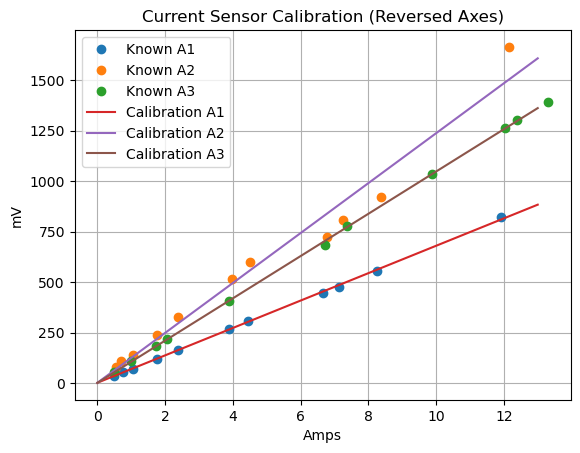

[67.85287623  1.62603625]


In [12]:
sources = ["fh","fl+im", "dlc", "dhc", "dhc+fh+im", "dlw", "dlw+fh+im", "dlh", "dlh+fh+im", "dhh"]
known_A1 = [.48, .75, 1.04, 1.75, 2.39, 3.90, 4.45, 6.65, 7.12, 8.25, 11.93]
known_A2 = [.54, .71, 1.04, 1.75, 2.39, 3.99, 4.52, 6.77, 7.25, 8.36, 12.15]
known_A3 = [.48, 1.0, 1.72, 2.06, 3.88, 6.72, 7.38, 9.88, 12.02, 12.4, 13.31]
mv_A1 = [36, 54,72, 121, 165, 268, 306, 448, 478, 554, 821]
mv_A2 = [78, 110, 141, 238, 328, 517, 600, 723, 810, 920, 1665]
mv_A3 = [53, 108, 183, 219, 406, 684, 778, 1037, 1264, 1305, 1391]
df1 = pd.DataFrame({"A": known_A1, "mv": mv_A1})
df2 = pd.DataFrame({"A": known_A2, "mv": mv_A2})
df3 = pd.DataFrame({"A": known_A3, "mv": mv_A3})
coeffs1 = np.polyfit(df1["A"], df1["mv"], 1)
coeffs2 = np.polyfit(df2["A"], df2["mv"], 1)
coeffs3 = np.polyfit(df3["A"], df3["mv"], 1)
poly1 = np.poly1d(coeffs1)
poly2 = np.poly1d(coeffs2)
poly3 = np.poly1d(coeffs3)
print("Calibration Polynomial 1 (A1): ")
print(poly1)
print("Calibration Polynomial 2 (A2): ")
print(poly2)
print("Calibration Polynomial 3 (A3): ")
print(poly3)
def A_to_mv1(A):
    return poly1(A)
def A_to_mv2(A):
    return poly2(A)
def A_to_mv3(A):
    return poly3(A)

def plot_calibration_reversed():
    x = np.linspace(0, 13, 100)
    y1 = poly1(x)
    y2 = poly2(x)
    y3 = poly3(x)
    plt.plot(df1["A"], df1["mv"], "o", label="Known A1")
    plt.plot(df2["A"], df2["mv"], "o", label="Known A2")
    plt.plot(df3["A"], df3["mv"], "o", label="Known A3")
    plt.plot(x, y1, "-", label="Calibration A1")
    plt.plot(x, y2, "-", label="Calibration A2")
    plt.plot(x, y3, "-", label="Calibration A3")
    plt.xlabel("Amps")
    plt.ylabel("mV")
    plt.title("Current Sensor Calibration (Reversed Axes)")
    plt.legend()
    plt.grid()
    plt.show()
plot_calibration_reversed()
print(coeffs1)

In [13]:
# y = mx + b
m = 104.7
b = .9221

x = 10.9
y = 800 

c = (y-b)/m
print(f"Calculated current for {y:0.2f} mV: {c:0.2f} A")

Calculated current for 800.00 mV: 7.63 A


#### understand concepts
The 1uF capacitor on S blocks the DC component of the bias voltage from dragging down and shorting out through the 53ohm internal R of the CT (as measured at the pins)

The **load impedance** isn't just the 53Ω CT - it's the **parallel combination** of:
- CT:  53Ω
- R1 || R2: 82kΩ || 153kΩ ~ 53K

Since 60kΩ >> 53Ω, the AC impedance is essentially **53Ω**.

But actually, for the **cutoff frequency**, what matters is the impedance that C1 sees:

**C1 sees:** CT (53Ω) in series with [R1 || R2] = 53Ω + 53kΩ ≈ **53kΩ**

#### To pass AC mV (60 Hz) and block the DC
for the **high-pass filter** cutoff, the relevant impedance is the **bias network** (R1||R2 = 53kΩ)

(The 53Ω only matters for loading the voltage divider with AC current, which is minimal with 60kΩ bias resistors. )

**Rule of Thumb:** Choose fc to be 1/10th of your lowest frequency of interest for minimal signal loss.

For fc = 6 Hz: 
C = 1 / (2π × 53,000 × 6) ≈ 0.5 µF
```

Round up to 1uF



#### calculating values

In [11]:
R1 = 82000
R2 = 153000
Rct =53

R1llR2 = (R1*R2)/(R1+R2)
print(f"Parallel resistance of R1 and R2: {R1llR2:0.1f} ohms")  
Vbias = 2.5 * R2 /(R1+R2)
print(f"Bias voltage at divider point: {Vbias:0.3f} V")

Rctll_R1llR2 = (Rct*R1llR2)/(Rct+R1llR2)
print(f"Total resistance seen at bias point with load: {Rctll_R1llR2:0.1f} ohms")

fc = 6  # hz 1/10 of 60hz
C1 = 1 / (2*3.14159 * R1llR2 * fc)

print(f"Capacitance needed: {C1*1e6:0.2f} uF")


Parallel resistance of R1 and R2: 53387.2 ohms
Bias voltage at divider point: 1.628 V
Total resistance seen at bias point with load: 52.9 ohms
Capacitance needed: 0.50 uF


### R controlling current through the lm4040
To account for the load, you need to ensure the resistor provides enough current for both the LM4040’s minimum operating current and the current drawn by your voltage divider (and any other load).

1. Calculate the current your voltage divider (and any other load) will draw from the reference:
   $$
   I_{load} = \frac{2.5\,V}{R_{divider}}
   $$
2. Add the LM4040’s minimum required current (from the datasheet, e.g., 60 µA):
   $$
   I_{total} = I_{load} + I_{min}
   $$
3. Calculate the resistor value:
   $$
   R = \frac{V_{in} - V_{ref}}{I_{total}}
   $$

Choose the next lower standard value to ensure enough current (e.g., 10 kΩ).

In [6]:
Iload = 2.5/(100000+150000)
print(f"Load current through resistor: {Iload*1000} mA")
Imin = 60e-6
print(f"Minimum current through resistor with load: {Imin*1000:0.3f} mA")
Itotal = Imin + Iload
print(f"Total current through resistor with load: {Itotal*1000:0.3f} mA")
R=(3.3-2.5)/Itotal
print(f"Resistor value to set minimum current with load: {R:0.1f} ohms")


Load current through resistor: 0.01 mA
Minimum current through resistor with load: 0.060 mA
Total current through resistor with load: 0.070 mA
Resistor value to set minimum current with load: 11428.6 ohms


## fixing the toolchain

Changed the default terminal in vscode to cmd. cmd-shift-p Terminal:Select default profile

cmd couldn't find `where python`
* "C:\Users\mcken\.platformio\penv\Scripts" needed to be added to system path 
  * windows search env...Edit environmental Variables, find path in system variables and add to the path

Platformio uses its own penv python. It complained about missing a library. Since cmd uses conda, pip would have used the active conda env pip and put it in the wrong place. To use Platformio's python: 
* C:\Users\mcken\.platformio\penv\Scripts\python.exe -m pip install intelhex

from cmd run `platformio system info` to see where python is and it is

### remember to hold the boot button on esp32's
A fatal error occurred: Failed to connect to ESP32: Wrong boot mode detected (0x13)! The chip needs to be in download mode
* Hold down the “BOOT” button on your ESP32 board.
* While holding “BOOT”, click “Upload” in PlatformIO/VSCode.
* Keep holding “BOOT” until you see the upload progress start (dots or percentage in the terminal).
* Release “BOOT” after the upload starts.

![](img/pinout.png)

    CONFIGURATION: https://docs.platformio.org/page/boards/espressif32/esp32doit-devkit-v1.html
    PLATFORM: Espressif 32 (6.12.0) > DOIT ESP32 DEVKIT V1
    HARDWARE: ESP32 240MHz, 320KB RAM, 4MB Flash

## esp32 dev kit1 pinout

![](../img/pinout.png)

## software setup 1

declare functions defined later before setup

### calibrateZeroOffset()

Take 500 samples: zeroOffsetADC is the average of the digital counts of the ADC at 0V

zeroOffsetADC = sum / numSamples;

For the ADS1115, each count at GAIN_ONE (±4.096 V) is 0.125 mV

Calibrating zero offset... ensure CT is not measuring any current

Zero offset calibrated: 12895.45 ADC counts

This corresponds to: 1.612 V bias

In [2]:
counts0 = 12895.45
volts0 = counts0 * 0.000125
print(f"Zero offset: {counts0:0.2f} counts = {volts0:0.3f} V")

Zero offset: 12895.45 counts = 1.612 V


In [9]:
counts7_1A = 10704
volts7_1A = .734
x = volts7_1A / counts7_1A
print(f"x = {x:0.8f},{x*2:0.8f}")

x = 0.00006857,0.00013714


In [10]:
cz= 16
vz=.0000015
x = vz/cz
print(f"x = {x:0.8f},{x*2:0.8f}") 

x = 0.00000009,0.00000019
